In [124]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
Credi=pd.read_csv('Copia de Propuesta de limpieza1.csv')

<Axes: xlabel='precio', ylabel='enganche'>

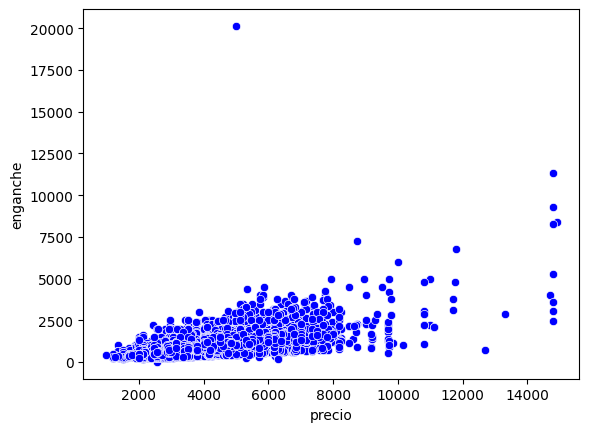

In [126]:
from turtle import color


sns.scatterplot(x='precio', y='enganche', color="blue", data=Credi)


<Axes: xlabel='precio', ylabel='monto_financiado'>

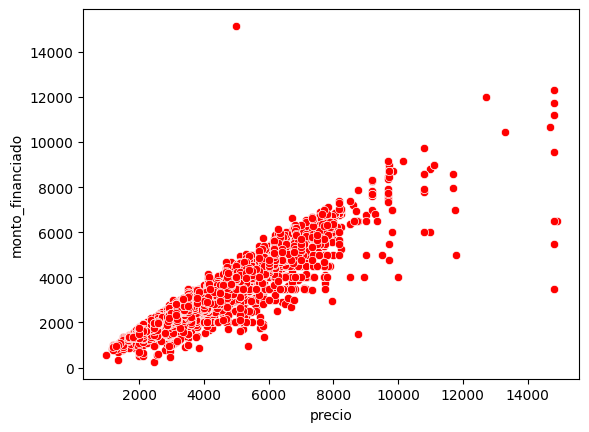

In [127]:
sns.scatterplot(x='precio', y='monto_financiado', color="red", data=Credi)

<Axes: xlabel='costo_total', ylabel='precio'>

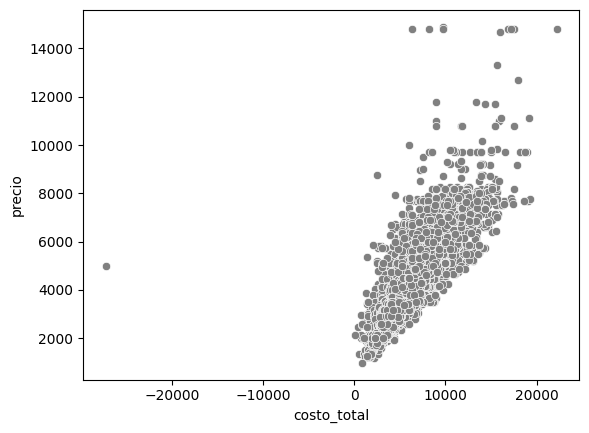

In [128]:
sns.scatterplot(x='costo_total', y='precio', color="gray", data=Credi)

<Axes: xlabel='costo_total', ylabel='monto_financiado'>

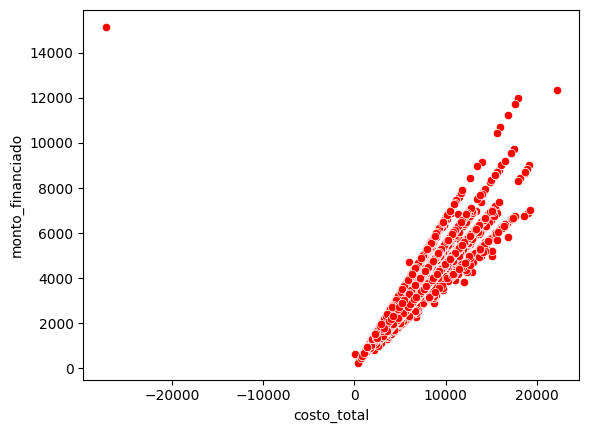

In [129]:
sns.scatterplot(x='costo_total', y='monto_financiado', color="red", data=Credi)

<Axes: xlabel='precio', ylabel='semana'>

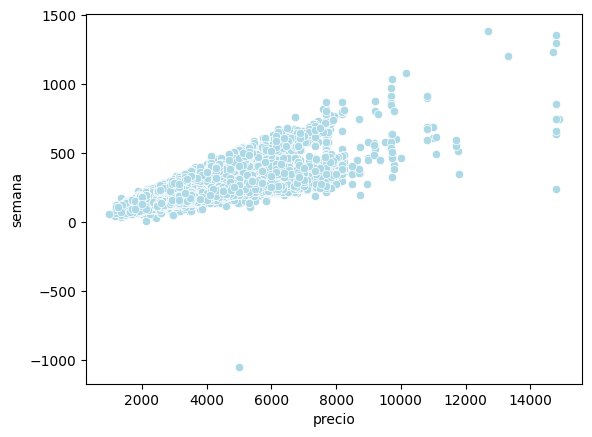

In [130]:
sns.scatterplot(x='precio', y='semana', color="lightblue", data=Credi)

<Axes: xlabel='precio', ylabel='pagos_realizados'>

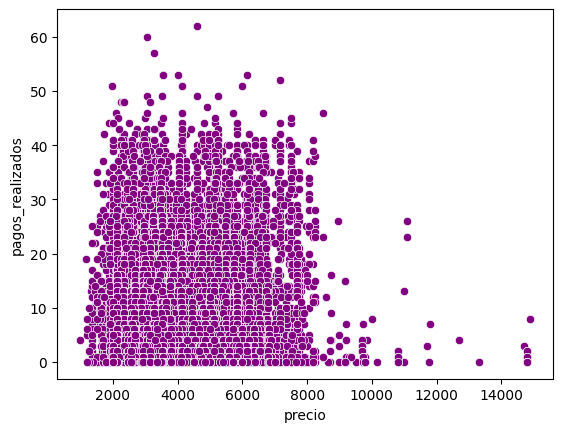

In [131]:
sns.scatterplot(x='precio', y='pagos_realizados', color="purple", data=Credi)

In [132]:
nn=Credi[['precio','enganche','monto_financiado','pagos_realizados', 'costo_total','semana']]
Corr_Factors=nn.corr()
Corr_Factors

Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,precio,enganche,monto_financiado,pagos_realizados,costo_total,semana
precio,1.000000,0.678519,0.951223,0.017000,0.872403,0.672673
enganche,0.678519,1.000000,0.458852,0.080730,0.355694,0.339912
monto_financiado,0.951223,0.458852,1.000000,0.051495,0.916193,0.674962
pagos_realizados,0.017000,0.080730,0.051495,1.000000,0.132380,0.133589
costo_total,0.872403,0.355694,0.916193,0.132380,1.000000,0.411911
semana,0.672673,0.339912,0.674962,0.133589,0.411911,1.000000


<Axes: >

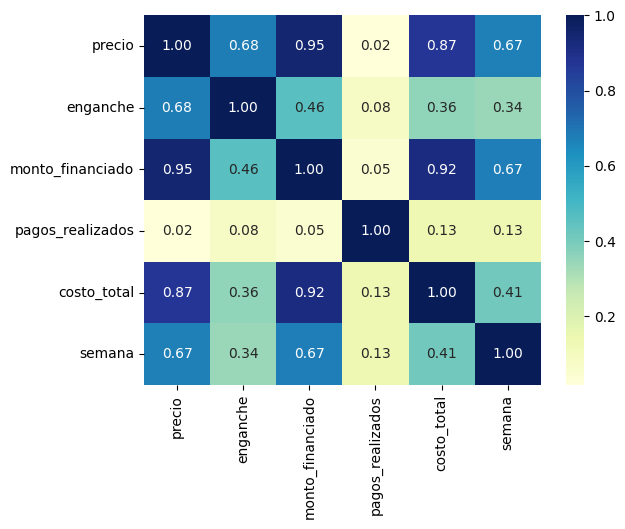

In [133]:

Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

In [134]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= nn[['monto_financiado', 'costo_total']]
Var_Dep= nn['precio']

In [135]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [136]:
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [137]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['monto_financiado', 'costo_total'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([1.1785344 , 0.00319357]),
 'rank_': 2,
 'singular_': array([391007.82919313,  60761.16357404]),
 'intercept_': 351.9307051856076}

In [138]:
model.score(Vars_Indep,Var_Dep)

0.9048310764679472

In [139]:
y_pred= model.predict(X=nn[['monto_financiado', 'costo_total']])
y_pred
nn.insert(0, 'Predicciones', y_pred)
nn

,Predicciones,precio,enganche,monto_financiado,pagos_realizados,costo_total,semana
0,1736.363082,1949.0,780.0,1169.0,0,2106,81
1,2658.235451,2999.0,1050.0,1949.0,0,2925,225
2,2090.255534,1959.0,490.0,1469.0,0,2210,170
3,2090.255534,1959.0,490.0,1469.0,0,2210,170
4,4173.695390,4299.0,1075.0,3224.0,0,6942,178
...,...,...,...,...,...,...,...
22730,3966.337632,3349.0,297.0,3052.0,0,5486,211
22731,3775.680232,4100.0,1209.0,2891.0,0,5200,200
22732,4730.228800,4849.0,1152.0,3697.0,0,6656,256
22733,8649.747543,9799.0,2799.0,7000.0,0,15054,386


<Axes: xlabel='monto_financiado', ylabel='precio'>

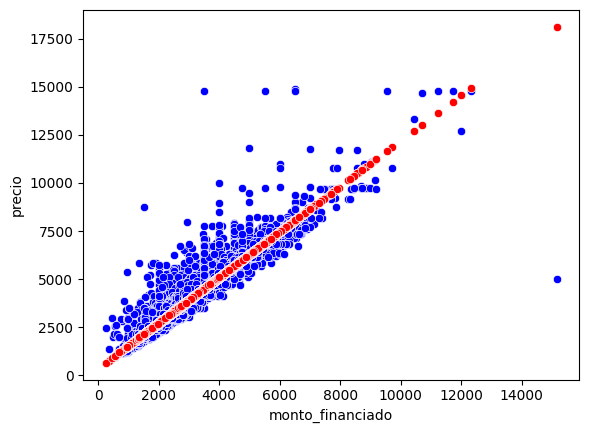

In [142]:
sns.scatterplot(x='monto_financiado', y='precio', color="blue", data=nn)
sns.scatterplot(x='monto_financiado', y='Predicciones', color="red", data=nn)
#sns.lineplot(x='monto_financiado', y='Predicciones', color="red", data=nn)

In [143]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.9048310764679472

In [144]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.951226091141295

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


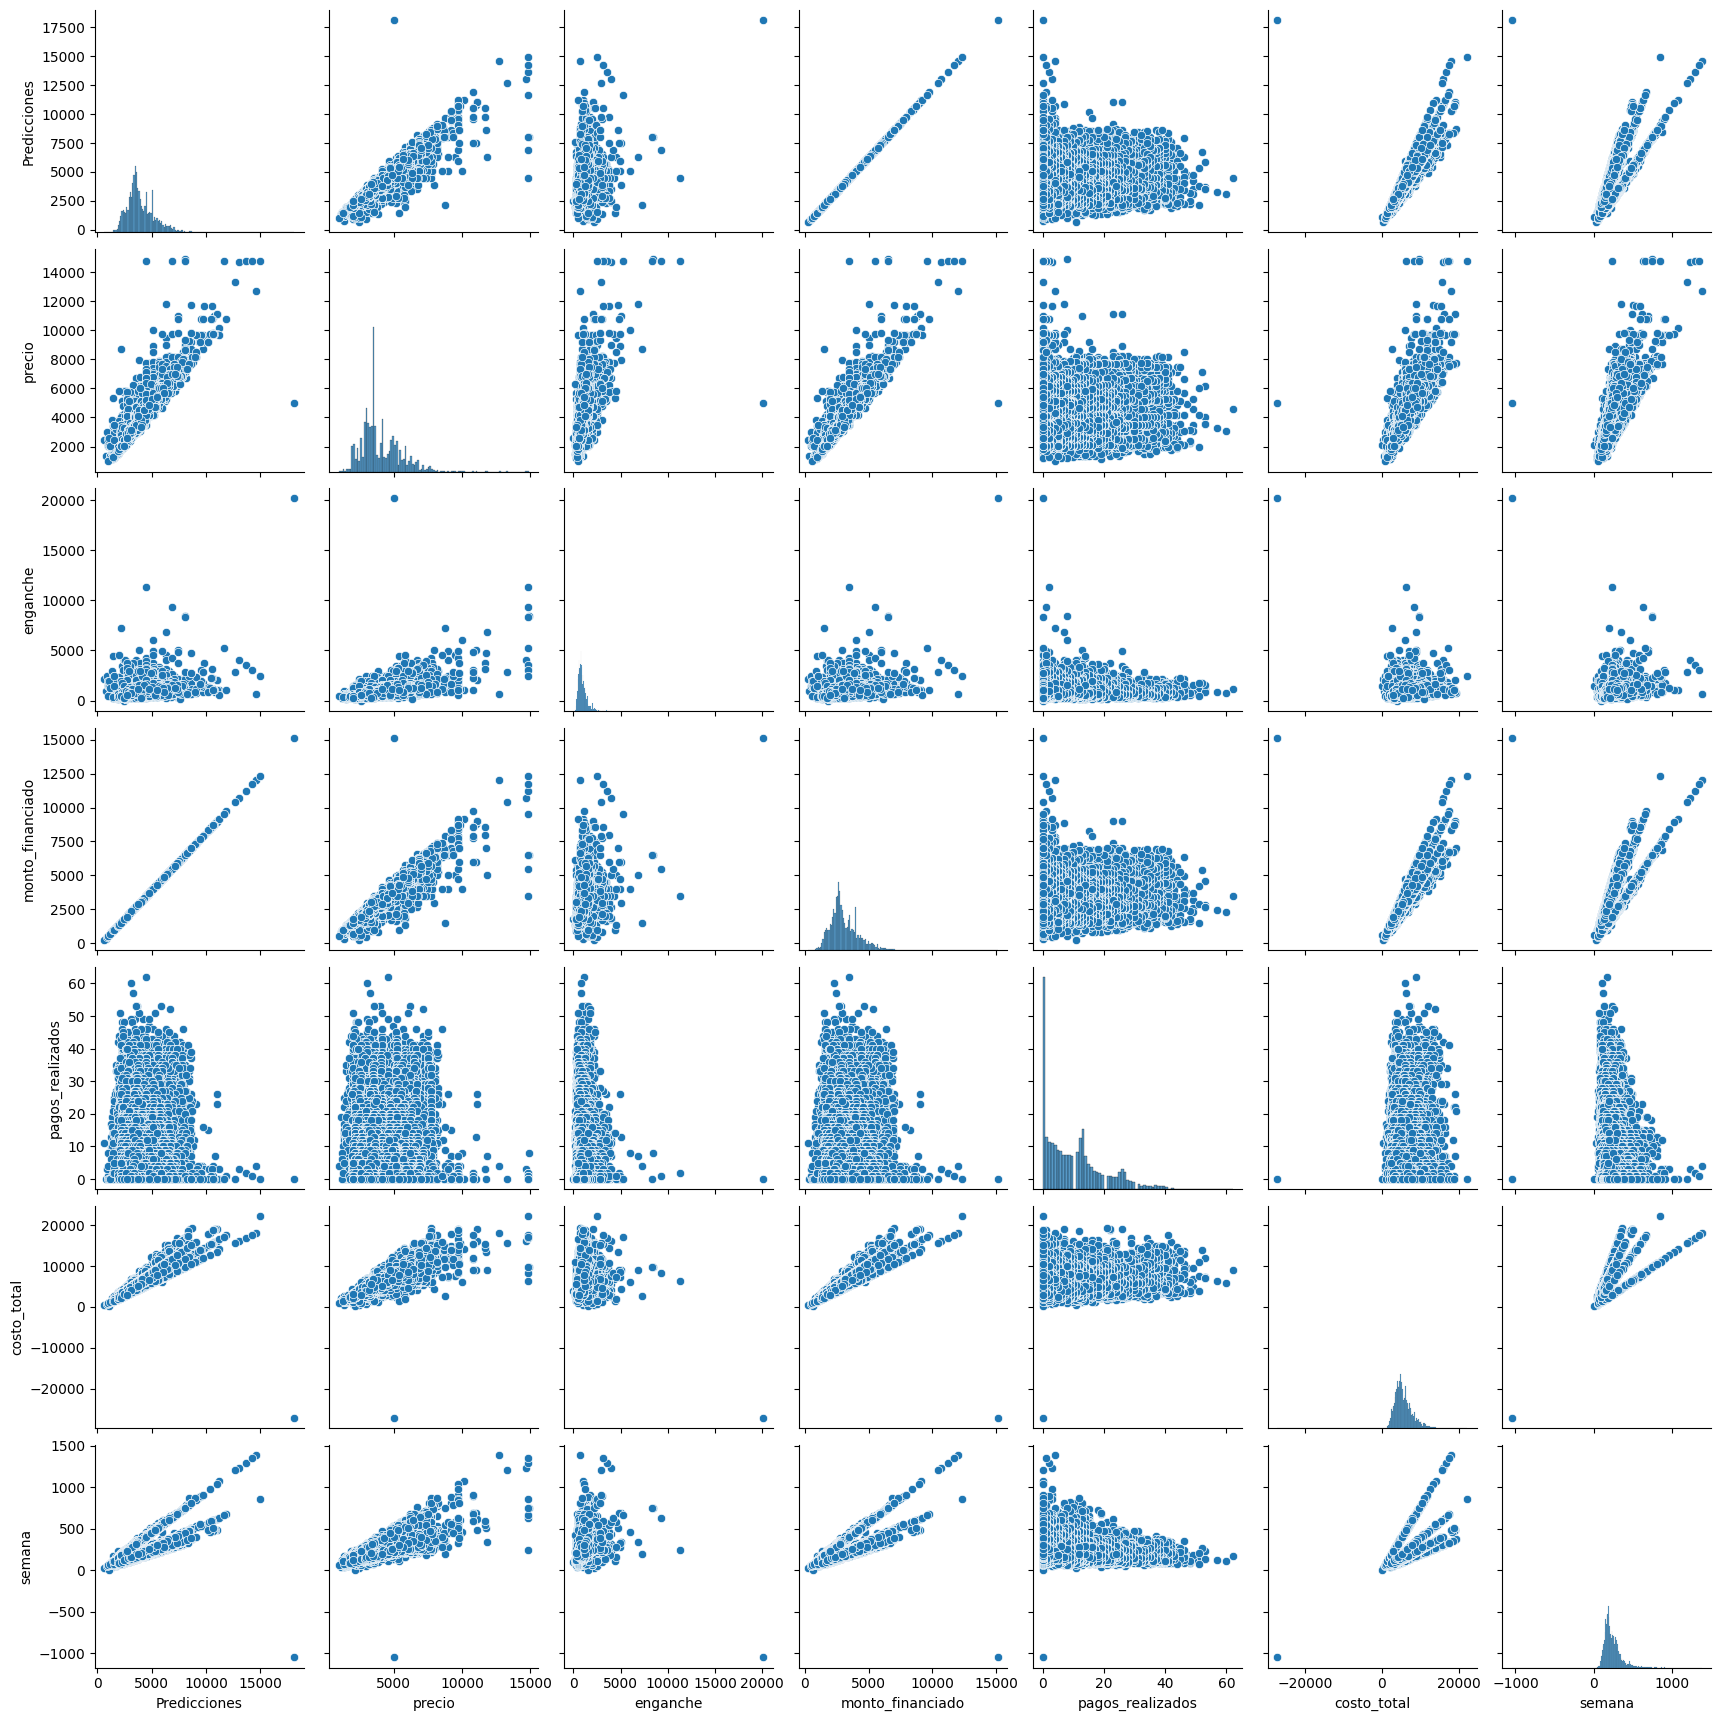

In [146]:
sns.pairplot(nn)